Importing pandas and numpy:

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

Reading .csv and setting start options:

In [7]:
pd.set_option('display.max_rows', 10)
df = pd.read_csv('layoffs.fyi_20240208_003251.csv', on_bad_lines='warn', sep=';')
df['id'] = df['id'].fillna(0).astype(int)
df = df.set_index('id')
df

Skipping line 997: expected 13 fields, saw 15



,Company,Location HQ,# Laid Off,Date,%,Industry,Source,List of emploees laid,Stage,$ Raised mm,Country,Date added
id,,,,,,,,,,,,
0,Grammarly,SF Bay Area,230,2024-02-07,no-data,Consumer,https://elbuz.com/en/grammarly-skorochue-230-c...,no-data,Unknown,$400,United States,2024-02-07
1,Fireblocks,New York City,20,2024-02-07,3%,Crypto,https://www.calcalistech.com/ctechnews/article...,no-data,Series E,"$1,000",United States,2024-02-07
2,Workfellow,EspooNon-U.S.,no-data,2024-02-07,100%,HR,https://tech.eu/2024/02/07/finnish-hrtech-star...,no-data,Seed,$3,Finland,2024-02-07
3,DocuSign,SF Bay Area,440,2024-02-06,6%,Sales,https://www.cnbc.com/2024/02/06/docusign-to-la...,no-data,Post-IPO,$536,United States,2024-02-06
4,Amazon,Seattle,400,2024-02-06,no-data,Retail,https://www.businessinsider.com/amazon-one-med...,no-data,Post-IPO,$108,United States,2024-02-07
...,...,...,...,...,...,...,...,...,...,...,...,...
3424,Service,Los Angeles,no-data,2020-03-16,100%,Travel,https://techcrunch.com/2020/03/16/travel-savin...,no-data,Seed,$5,United States,2020-08-31
3425,HopSkipDrive,Los Angeles,8,2020-03-13,10%,Transportation,https://layoffs.fyi/2020/04/02/hopskipdrive-la...,no-data,Unknown,$45,United States,2020-04-02
3426,Panda Squad,SF Bay Area,6,2020-03-13,75%,Consumer,https://twitter.com/danielsinger/status/123854...,no-data,Seed,$1,United States,2020-04-16


Plotting "Laid off" amount + taking not into account companies with no-data: 

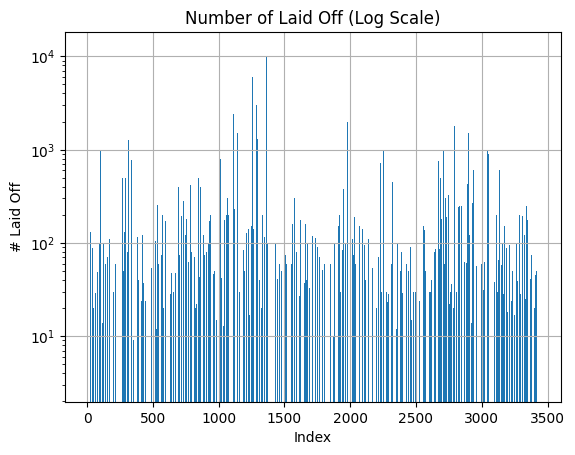

In [8]:
df['# Laid Off'] = pd.to_numeric(df['# Laid Off'], errors='coerce')
df.dropna(subset=['# Laid Off'], inplace=True)
plt.bar(df.index, df['# Laid Off'])
plt.yscale('log')
plt.xlabel('Index')
plt.ylabel('# Laid Off')
plt.title('Number of Laid Off (Log Scale)')
plt.grid(True)
plt.show()

Plotting % of laid offs:

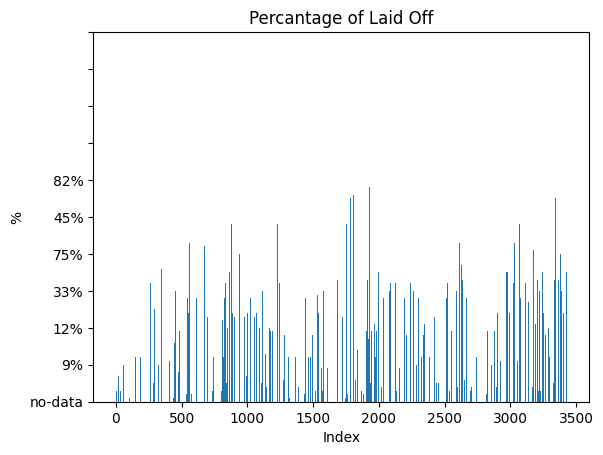

In [76]:
plt.bar(df.index.values, df['%'])
plt.yticks(range(0, 101, 10))
plt.xlabel('Index')
plt.ylabel('%')
plt.title('Percantage of Laid Off')
plt.show()


Arrays(if needed):

In [9]:
array_pr = df['%'].to_numpy()
print(array_pr)

['no-data' '3%' '6%' ... '75%' '40%' 'no-data']


In [10]:
array_nm = df['# Laid Off'].to_numpy()
print(array_nm)

[230.  20. 440. ...   6.  20.  75.]
